# Graficación en Python
### Luis Daniel Amador Islas

## 1. Gráfica de datos experimentales

El archivo $\texttt{manchasolares.txt}$ (adjunto), contiene el número observado de manchas solares en el Sol en cada mes desde enero de 1749. El archivo contiene dos columnas de números, la primera es el mes y la segunda el número de manchas solares

_a)_ Escribe un programa que lea los datos y haga una gráfica de las manchas solares en funcion del tiempo.

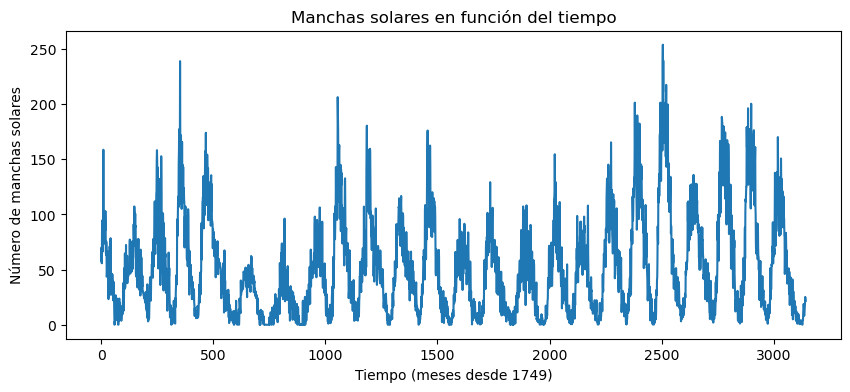

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos (dos columnas: mes, manchas solares)
datos = np.loadtxt("manchasolares.txt")

# Separar las columnas
tiempo = datos[:,0]   # meses
manchas = datos[:,1]  # número de manchas solares

# Graficar
plt.figure(figsize=(10,4))
plt.plot(tiempo, manchas)
plt.xlabel("Tiempo (meses desde 1749)")
plt.ylabel("Número de manchas solares")
plt.title("Manchas solares en función del tiempo")
plt.show()

_b)_ Modifica tu programa para mostrar solo los primeros 1000 datos (experimentales)en la gráfica.

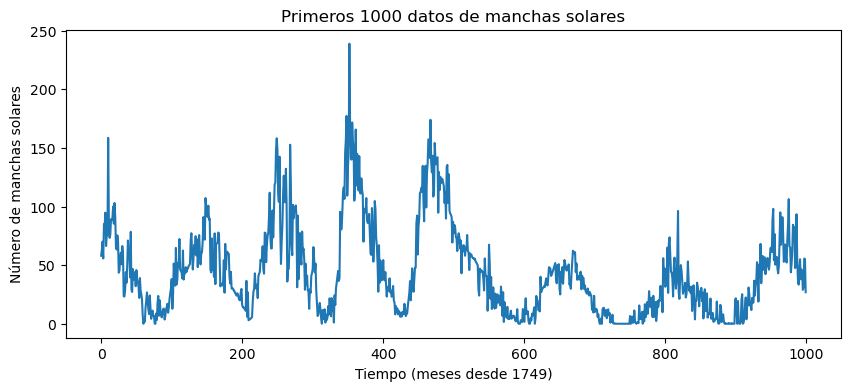

In [3]:
# Tomar solo los primeros 1000 datos
tiempo_1000 = tiempo[:1000]
manchas_1000 = manchas[:1000]

plt.figure(figsize=(10,4))
plt.plot(tiempo_1000, manchas_1000)
plt.xlabel("Tiempo (meses desde 1749)")
plt.ylabel("Número de manchas solares")
plt.title("Primeros 1000 datos de manchas solares")
plt.show()

_c)_ Modifica nuevamente tu programa para calcular y graficar la _media (promedio) móvil_ de los datos, definida por:

$$
Y_k = \frac{1}{2r+1} \sum_{m=-r}^{r} y_{k+m},
$$

donde $r = 5$ (en este caso) y $y_k$ son los números de manchas solares. El programa debe graficar tanto los datos originales como la _media móvil_ en el mismo gráfico, sólo sobre los primeros 1000 datos.

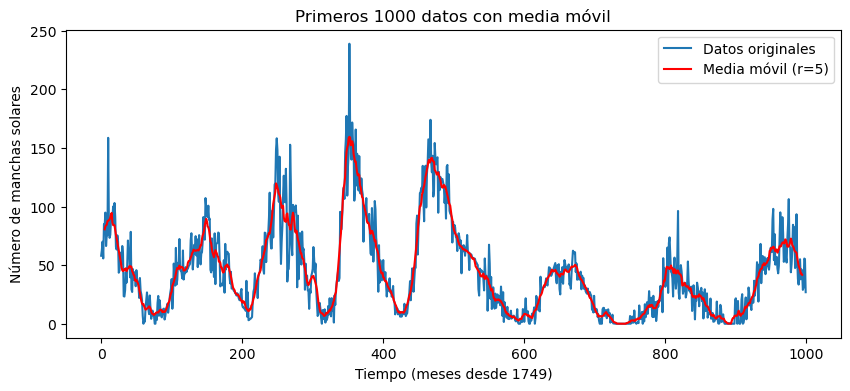

In [4]:
r = 5
manchas_media = []

# Calcular la media móvil solo para los primeros 1000 datos
for k in range(1000):
    if k < r or k > 1000-r-1:
        # En los bordes no se puede calcular bien la media
        manchas_media.append(np.nan)
    else:
        suma = 0
        for m in range(-r, r+1):
            suma += manchas_1000[k+m]
        promedio = suma / (2*r + 1)
        manchas_media.append(promedio)

# Graficar los datos originales y la media móvil
plt.figure(figsize=(10,4))
plt.plot(tiempo_1000, manchas_1000, label="Datos originales")
plt.plot(tiempo_1000, manchas_media, label="Media móvil (r=5)", color="red")
plt.xlabel("Tiempo (meses desde 1749)")
plt.ylabel("Número de manchas solares")
plt.title("Primeros 1000 datos con media móvil")
plt.legend()
plt.show()

## 2. La gráfica de Feigenbaum (caos determinista)

En un especial _halloween_ de los Simpsons, Homero viaja al pasado a la era Jurásica y por un pequeño descuido cambia el curso de toda la historia en el futuro. Lo anterior es una referencia al cuento _A Sound of Thunder_ de 1952 del escritor de ciencia ficción Ray Bradbury en donde lo que se destruye en el pasado es una mariposa. Esta idea fue retomada y popularizada por el físico Edward Lorenz en 1972 cuando dio una conferencia en la Asociación Estadounidense para el Avance de la Ciencia (_American Association for the Advancement of Science_) titulada "¿El aleteo de una mariposa en Brasil puede provocar un tornado en Texas?". Dando paso al concepto del _efecto mariposa_, del cual probablemente hayas oído hablar y que es el ejemplo clásico de _caos determinista_ en sisteas climáticos. El caos determinista tambien aparece en muchos sistemas físicos más complejos, incluyendo especialmente la dinámica de fluidos. Debido a su naturaleza aparentemente aleatoria, el comportamiento de los sitemas caóticos es difícil de peredecir y se ve fuertemente afectado por pequeñas perturbaciones en las condiciones iniciales. Uno de los ejemplos más famosos del fenómeno del caos determinista es sin duda el _mapeo logístico_, que es un sistema matemático muy simple, definido por la ecuación:

$$X_{n+1} = rx_{n}(1-x_{n})$$ 

Para un valor dado de la constante _r_, se toma un valor de $x_{n}$ (digamos $x=\frac{1}{2}$) y se introduce en el lado derecho de esta ecuación y regresa un valor de $x_{n+1}$. Luego se toma ese valor y se vuelve a introducir enn el lado derecho, lo que da otro valor, y así sucesivamente. Esto es un _mapeo iterativo_. Se continua haciendo la misma operación una y otra vez sobre su valor de $x_{n}$, y entonces sucede una de las siguientes tres situaciones:

($\texttt{I}$) El valor se establece en un número fijo y permanece allí. Esto se llama _punto fijo_. Por ejemplo, $x_{n} = 0$ es siempre un punto fijo del mapeo logístico. (Si se pone $x_{n+1} = 0$ en el lado izquierdo).

($\texttt{II}$) No se establece un solo valor, sino que se establece en un patrón periódico, rotando alrededor de un conjunto de valores, digamos cuatro valores, repitiéndose en una secuencia una y otra vez. Esto se llama **_orbita_(en este caso de _periodo 4_)** o _ciclo límite_.

($\texttt{III}$) Todo enloquece. El mapeo, genera una secuencia **aparentemente aleatoria** de números que parecen no tener ni patrón ni razón (_ni ton ni son_). Esto es el **_caos determinista_**. "Caos" porque realmente parece caótico y "determinista" porque aunque los valores parecen aleatorios, **no lo son**. Son a todas luces, totalmente predecibles, porque se obtienen mediante una simple ecuación y el comportamiento está **determinado**, aunque no lo parezca.

**Responde a las siguientes preguntas:**

_a_) Apoyate en el programa que vimos en clase y **escribe un programa que muestre el comportamiento del mapeo logístico** mediante una gráfica.

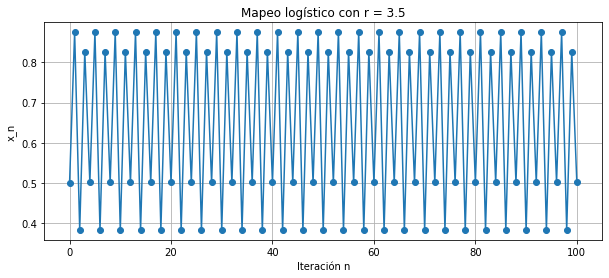

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros iniciales
r = 3.5           # parámetro de control
x0 = 0.5          # condición inicial
n_iter = 100      # número de iteraciones

# Lista para guardar los valores
x = [x0]

# Iterar el mapeo logístico
for i in range(n_iter):
    xn = r * x[-1] * (1 - x[-1])   # fórmula del mapeo
    x.append(xn)

# Graficar
plt.figure(figsize=(10,4))
plt.plot(x, marker="o", linestyle="-")
plt.xlabel("Iteración n")
plt.ylabel("x_n")
plt.title(f"Mapeo logístico con r = {r}")
plt.grid(True)
plt.show()

_b_) De acuerdo a tu gráfica, a qué valor de _r_ el sistema pasa de un comportamiento ordenado (puntos fijos o ciclos límite) a un comportamiento caótico? A este punto a veces se le llama "el borde del caos".

**Hint:** Esto es lo que debes hacer para tu programa:
Para un valor dado de _r_, comienza con $x_{n} = \frac{1}{2}$ e itera la ecuación del mapeo logístico mil veces. Eso le dará la oportunidad de establecerse ene un puto fijo o en una orbita de algún periodo. Luego ejecuta otras mil iteraciones y grafica los puntos (r, $x_{\infty}$) en una gráfica donde el eje horizontal es _r_ y el eje vertical es $x_{\infty}$. Puedes usar la función $\texttt{plot}$ con las opciones "$\texttt{ko}$" o "$\texttt{k.}$" para dibujar una gráfica con puntos, uno para cada punto, o puedes usar la función $\texttt{scatter}$ para dibujar un diagrama de dispersión (que siempre usa puntos). Repite todo el cálculo para valores de _r_ en la misma figura. Tu programa debería generar la distintiva gráfica que parece un árbol inclinado hacia un lado. Esta famosa imagen se llama _Gráfica de Feigenbaum_, en honor a su descubridor Mitchell Feigenbaum.

1. Tomamos un rango de valores de $r$ (por ejemplo entre 2.5 y 4.0).
2. Para cada valor de $r$:

   * Empezamos con $x_0 = 0.5$.
   * Iteramos la ecuación unas **2000 veces**.
   * **Ignoramos las primeras 1000** (para dejar que se estabilice).
   * Guardamos las siguientes 1000 iteraciones como puntos.
3. Graficamos todos los puntos $(r, x)$.

   * El eje horizontal = $r$.
   * El eje vertical = valores posibles de $x$.

Así aparece la famosa **gráfica en forma de árbol**, que muestra los **puntos fijos, ciclos y caos**.

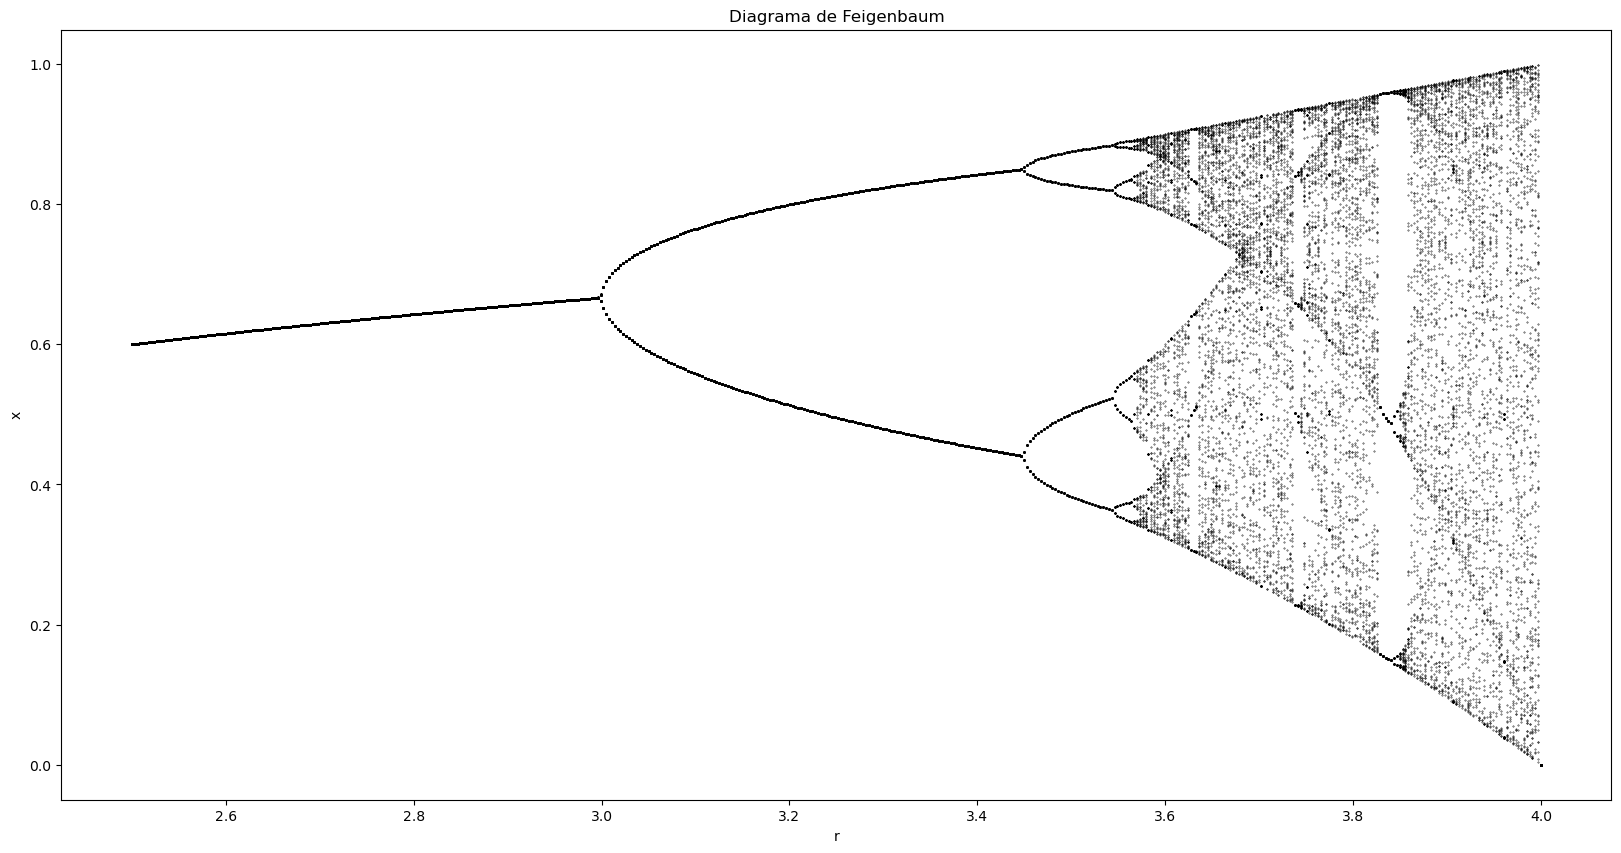

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Rango de valores de r
r_values = np.linspace(2.5, 4.0, 500)  # 500 valores de r entre 2.5 y 4.0
x0 = 0.5   # condición inicial
n_iter = 1000  # número total de iteraciones
n_show = 100  # número de iteraciones a mostrar (después de estabilizarse)

# Listas para guardar los puntos
R = []
X = []

for r in r_values:
    x = x0
    # Dejar que el sistema se estabilice (primeras 1000 iteraciones)
    for i in range(n_iter - n_show):
        x = r * x * (1 - x)
    # Guardar las últimas 1000 iteraciones
    for i in range(n_show):
        x = r * x * (1 - x)
        R.append(r)
        X.append(x)

# Gráfica de Feigenbaum
plt.figure(figsize=(20,10))
plt.scatter(R, X, s=0.1, color="k")  # puntos muy pequeños
plt.xlabel("r")
plt.ylabel("x")
plt.title("Diagrama de Feigenbaum")
plt.show()

_c_) **Opcional:** Hay otra forma para calcular el diagrama de Feigenbaum, que puede ser más claro y rápido, dado que hace uso de la capacidad de Python para realizar aritmética con arreglos completos. Crear un arreglo r que contenga cada valor distinto de _r_, [1.0, 1.01, 1.02, ...]. Crea otro arreglo $\texttt{x}$ del mismo tamaño para guardar los valores correspondientes de $x$, establecidos inicialmente en 0.5; finalmente realiza una iteración del mapeo logístico para todos los valores de _r_ a la vez, con una sola instrucción de la forma $\texttt{x = r*x*(1-x)}$ y comparala con tu programa anterior.

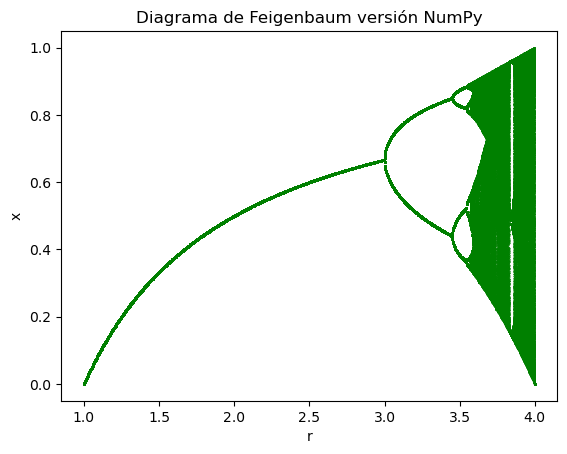

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Rango de valores de r (1000 puntos entre 1 y 4)
r = np.linspace(1.0, 4.0, 1000)
x = np.full_like(r, 0.5)  # arreglo x inicializado en 0.5

n_iter = 2000   # iteraciones totales
n_show = 1000   # iteraciones a mostrar después de estabilizarse

# Iterar el mapeo logístico para todos los valores de r a la vez
for i in range(n_iter):
    x = r * x * (1 - x)
    if i >= (n_iter - n_show):  # guardar solo las últimas iteraciones
        plt.scatter(r, x, s=0.1, color="g")

# Gráfica de Feigenbaum
plt.xlabel("r")
plt.ylabel("x")
plt.title("Diagrama de Feigenbaum versión NumPy")
plt.show()

Comparando ambos metodos
El método del inciso b) calcula cada valor de $r$ uno por uno → más lento.

El método del inciso c) aprovecha NumPy → todo se calcula en paralelo → mucho más rápido y limpio.

El resultado en la gráfica es idéntico, pero se nota la diferencia de tiempo cuando aumentas la resolución de $r$ (por ejemplo 10,000 valores).

## 3. El conjunto de Mandelbrot

El conjunto de Mandelbrot, llamado así por su descubridor, el matemático francés Benoît Mendelbrot, es un $fractal$; un objeto matemático infinitamente ramificado que contiene estructura denteo de estructura dentro de estructura, tan profundamente como queramos mirar. La definición del conjunto de Mandelbrot en términos de números complejos es la siguiente.
Consideremos la ecuación:
$$z_{n+1} = 2_n^2 + c, \quad z_n, c\in \mathbb{C}$$
donde $z_n$ es un número complejo y $c$ es una constante compleja. De manera, muy similar al _mapeo logístico_, la definición del _conjunto de Mandelbrot_ implica la  iteración repetida de esta ecuación para cualquier valor dado de $c$. La ecuación convierte un número de entrada $z_n$ en un número de salida $z_{n+1}$; de tal manera que se toma un valor inicial de $z_0$ y se introduce en la ecuación para obtener un nuevo valor $z_1$, luego tomamos ese valor y lo volvemos a introducir para obtener $z_2$ y así sucesivamente.

Así, el conjunto de Mandelbrot es el conjunto de puntos del plano complejo que satisface la siguiente definición:

$$Para\ un\ valor\ dado\ de\ c\ y\ la\ condición\ inicial\ z_0 = 0;\ si\ al\ iterar\ repetidamente\ la\ ecuación,\\ la\ magnitud\ del\ valor\ resultante\ es\ mayor\ a\ dos\ (i.e.\ |z_{\infty}| > 2),\ entonces\ el\ punto\ del\ plano\\ complejo\ para\ ese\ valor\ c\ no\ está\ en\ el\ conjunto\ de\ Mandelbrot;\ de\ lo\ contrario,\ si\ está\ en\ el\ conjunto$$.

Para utilizar esta definición, en principio, habría que iterar infinitas veces para demostrar que un punto está en el conjunto de Mandelbrot, ya que un punto está en el conjunto sólo si la iteración nunca pasa de $|z_n| = 2$. Sin embargo, en la práctica, simplemente se realiza una gran cantidad de iteraciones (digamos 100) y si $|z_n|$ no ha exedido 2 en ese momento, entonces lo consideramos suficientemente bueno.

_a)_ **Escribe un programa para crear una imagen del conjunto de Mandelbrot** realizando la iteración para todos los valores de $c = x + \text{i}y$ en una cuadrícula de $N \times N$ que abarque la región donde $-2 \leq x \leq 2$ y $-2 \leq y \leq 2$. Haz una gráfica de densidad ($density\ plot$) en el que los puntos de la cuadrícula dentro del conjunto de Mandelbrot estén coloreados en negro y los de afuera estén coloreados en blanco.

**_Sugerencia_:** Probablemente te resulte útil comenzar con una cuadrícula muy simple, es decir, con un valor pequeño de $N$ (quizás $N = 100$) para que tu programa se ejecute rápidamente mientras lo pruebas. Una vez que te asegures de que funciona correctamente, aumenta el valor de $N$ para producir una imagen fina de alta calidad de la forma del conjunto.

/tmp/ipykernel_5951/2749678652.py:20: RuntimeWarning: overflow encountered in square
  Z = Z**2 + C
/tmp/ipykernel_5951/2749678652.py:20: RuntimeWarning: invalid value encountered in square
  Z = Z**2 + C


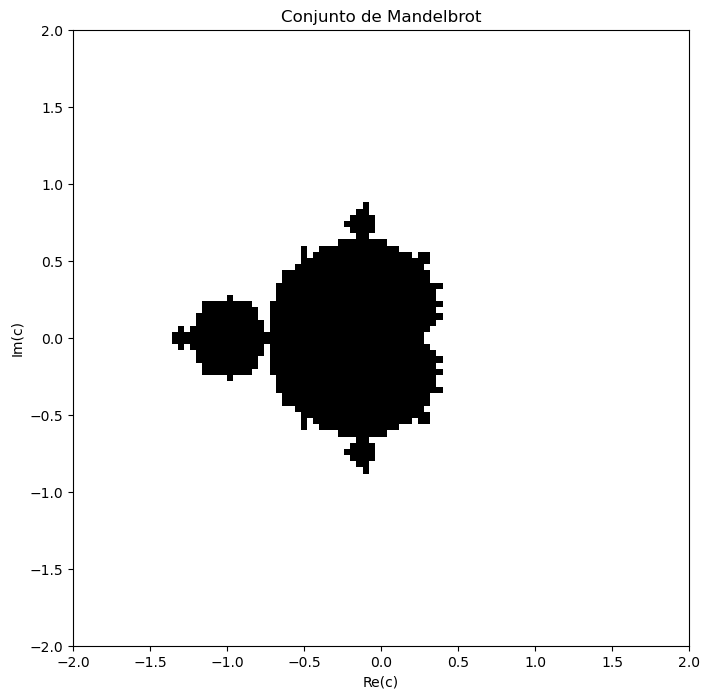

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
N = 100          # resolución de la cuadrícula
iter_max = 1000   # número máximo de iteraciones

# Crear la cuadrícula de valores de c
x = np.linspace(-2, 2, N)
y = np.linspace(-2, 2, N)
X, Y = np.meshgrid(x, y)
C = X + 1j*Y   # complejos

# Inicializar Z en 0 y un arreglo para marcar pertenencia al conjunto
Z = np.zeros_like(C, dtype=complex)
mandelbrot = np.ones(C.shape, dtype=bool)

# Iterar la fórmula
for k in range(iter_max):
    Z = Z**2 + C
    mandelbrot &= (np.abs(Z) <= 2)  # solo quedan dentro los que no escapan

# Graficar
plt.figure(figsize=(8,8))
plt.imshow(mandelbrot, extent=[-2,2,-2,2], cmap="binary")
plt.xlabel("Re(c)")
plt.ylabel("Im(c)")
plt.title("Conjunto de Mandelbrot")
plt.show()

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
N = 100          # resolución de la cuadrícula
iter_max = 1000   # número máximo de iteraciones

# Crear la cuadrícula de valores de c
x = np.linspace(-2, 2, N)
y = np.linspace(-2, 2, N)
X, Y = np.meshgrid(x, y)
C = X + 1j*Y   # complejos

# Inicializar Z en 0 y un arreglo para marcar pertenencia al conjunto
Z = np.zeros(C, dtype=complex)
mandelbrot = np.ones(C.shape, dtype=bool)

# Iterar la fórmula
for k in range(iter_max):
    Z = Z**2 + C
    mandelbrot &= (np.abs(Z) <= 2)  # solo quedan dentro los que no escapan

# Graficar
plt.figure(figsize=(8,8))
plt.imshow(mandelbrot, extent=[-2,2,-2,2], cmap="binary")
plt.xlabel("Re(c)")
plt.ylabel("Im(c)")
plt.title("Conjunto de Mandelbrot")
plt.show()

AttributeError: module 'numpy' has no attribute 'shade'

_b)_ **Opcional:** Si te aburrio lo anterior (o resultó demasiado fácil), puedes programar otra variante del mismo ejercicio que puede producir imágenes sorprendentes. En lugar de colorera los puntos solo en blanco o negro, colorea los puntos de acuerdo con el número de iteraciones de la ecuación antes de que $|z_n|$ sea mayor que 2 (o bien el número máximo de iteraciones si es que $|z_n|$ nunca llega a ser mayor que 2). Si usas alguno de los esquemas más coloridos que Python proporciona para las gráficas de densidad, como "$\texttt{hot}$" o "$\texttt{jet}$", puedes crear algunas imágenes muy espectaculares. Otra variante interesante es colorear según el logaritmo del número de iteraciones, lo que ayuda a revelar parte de la estructura más fina fuera del conjunto.

# A partir de aqui me puse a jugar con los colormaps, por lo que el codigo es muy largo, pero se pueden visualizar bastantes imagenes que efectivamente eran muy bonitas

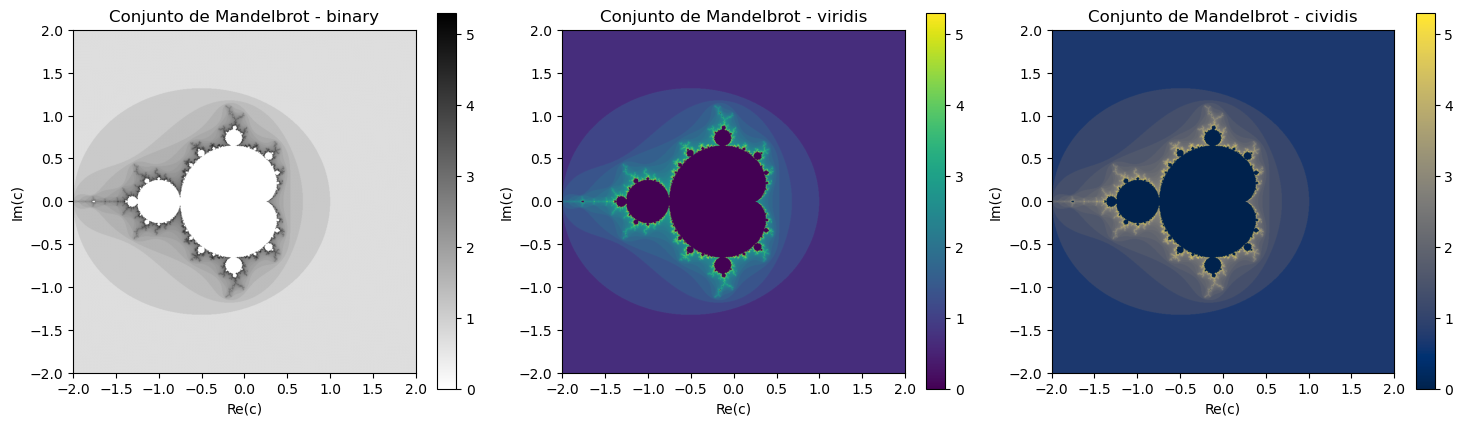

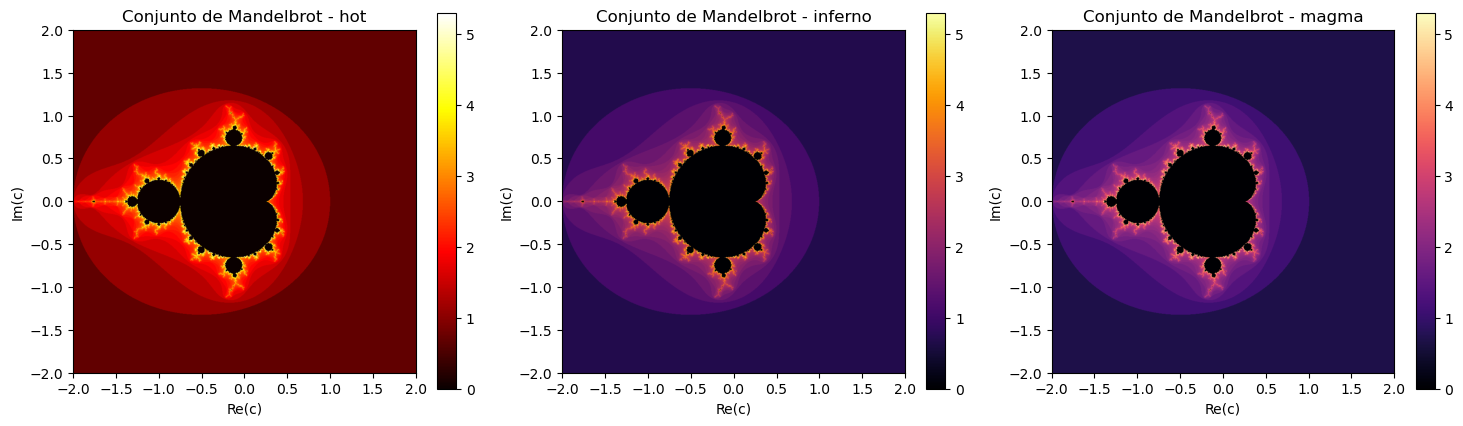

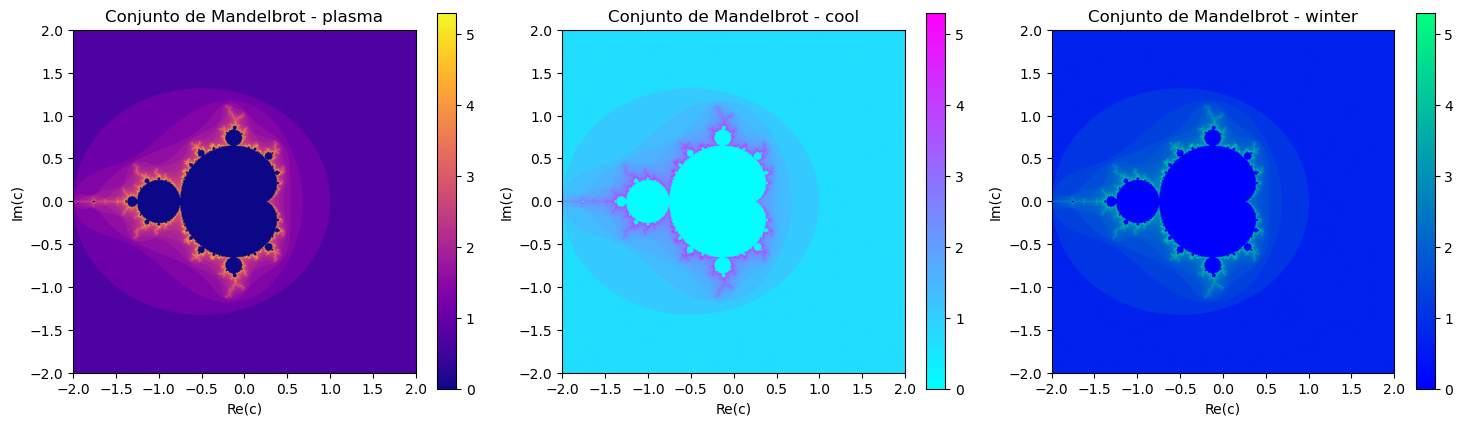

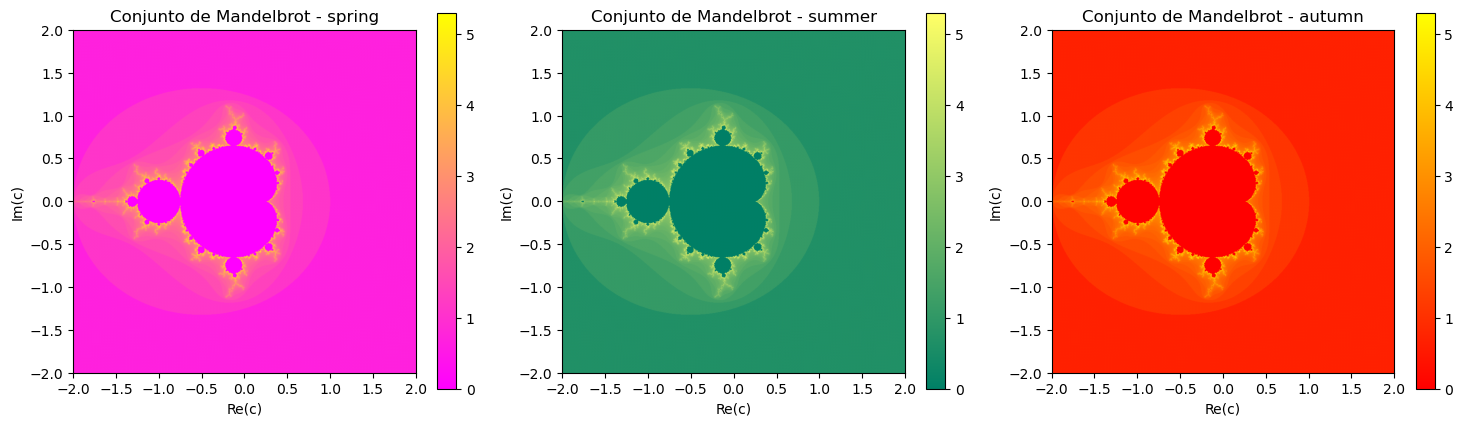

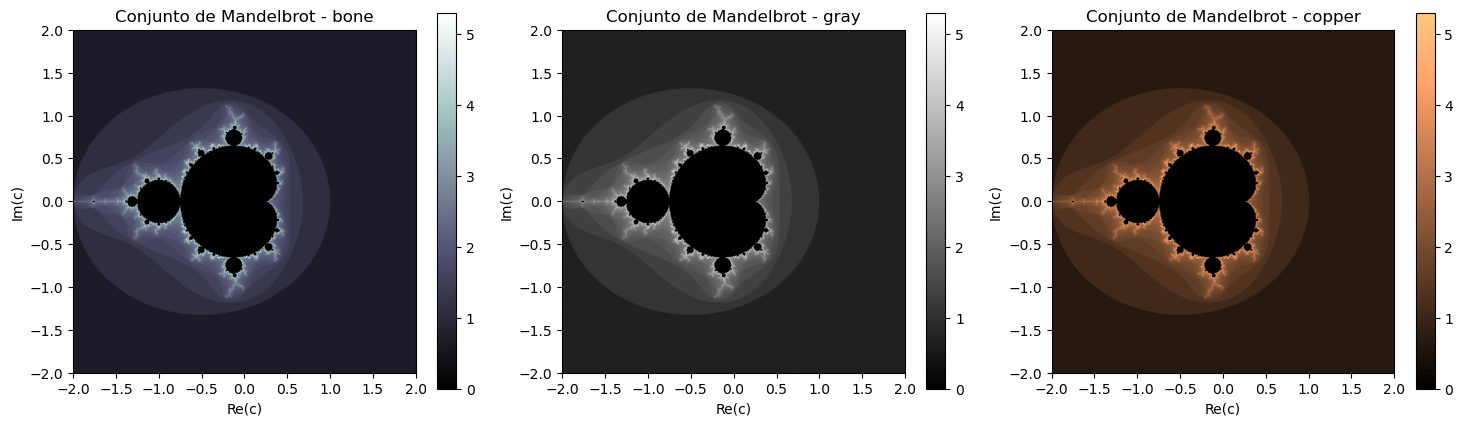

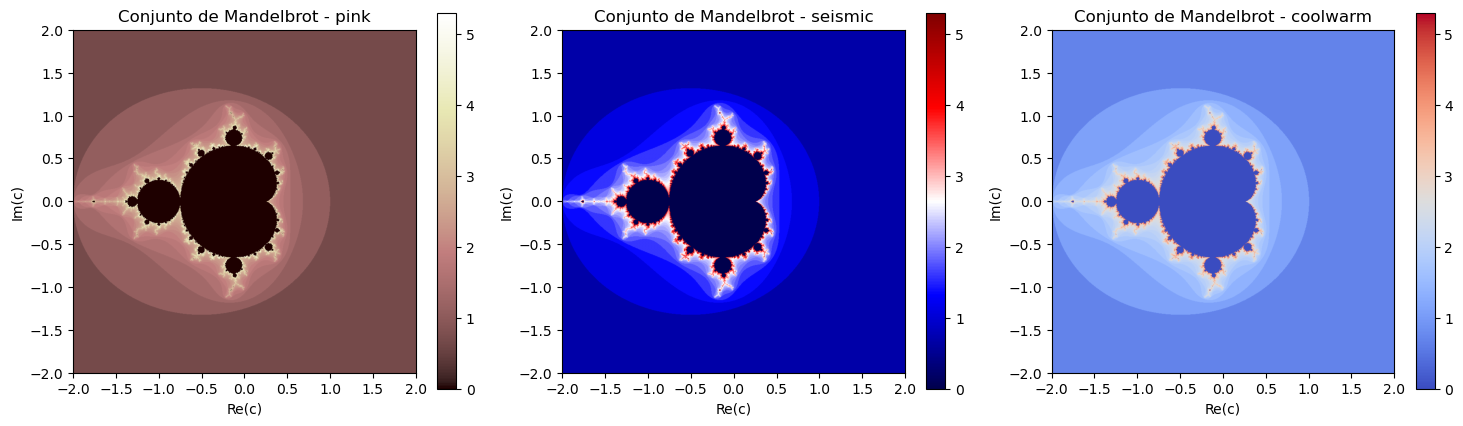

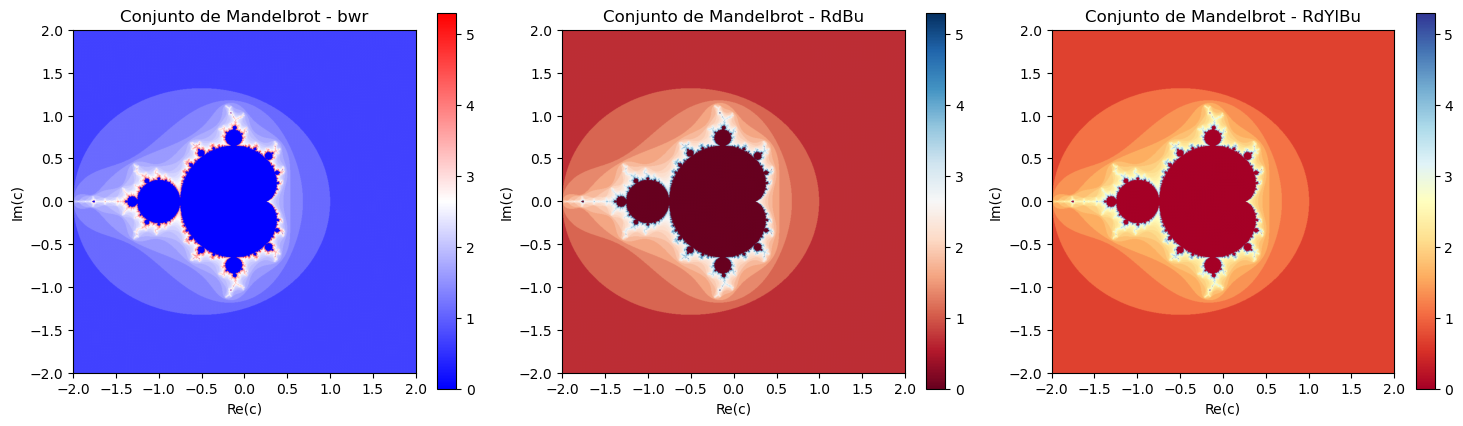

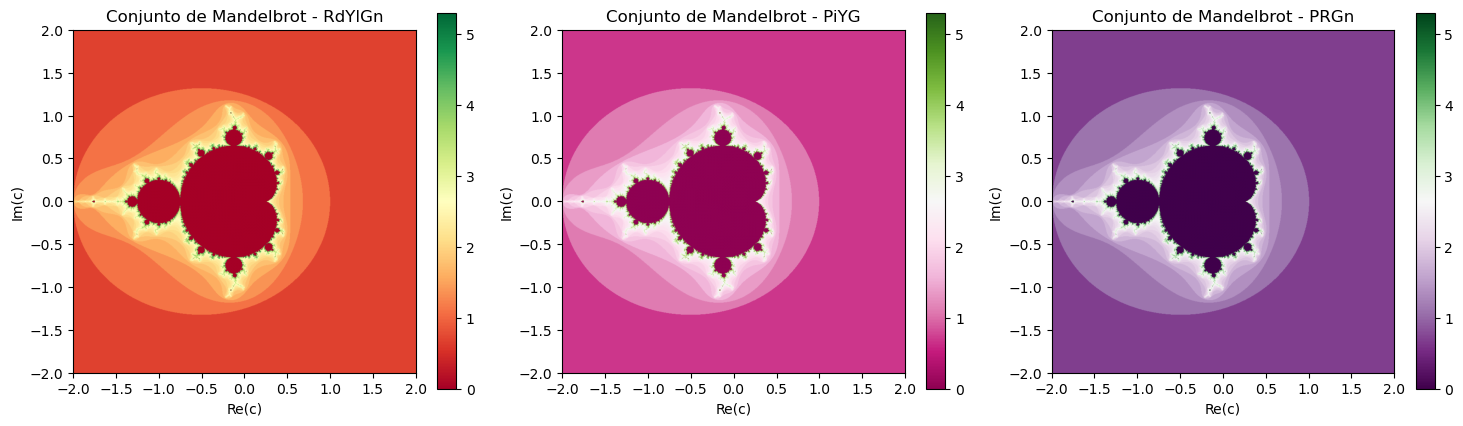

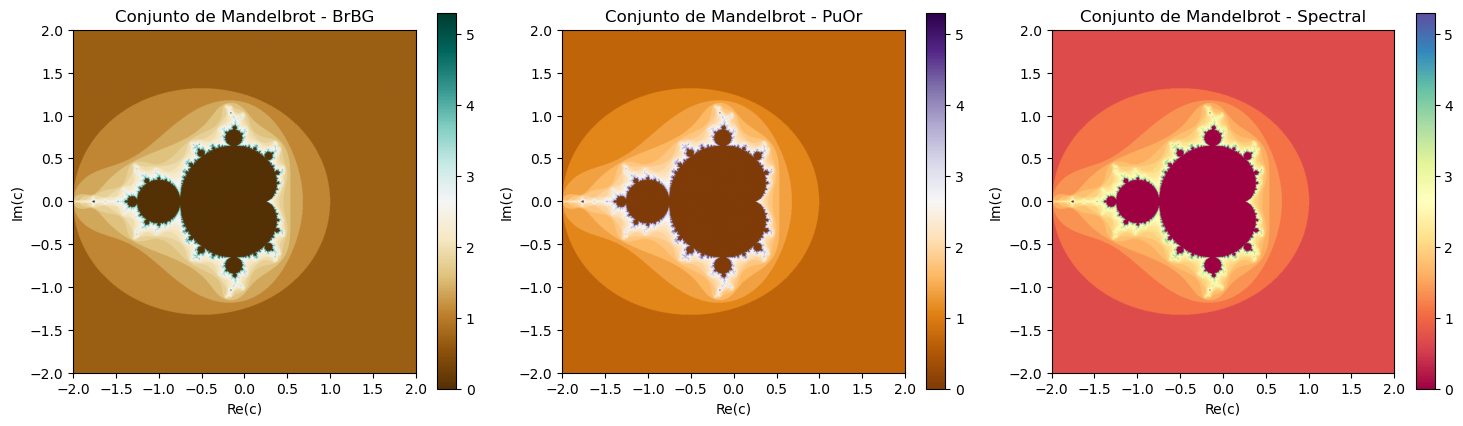

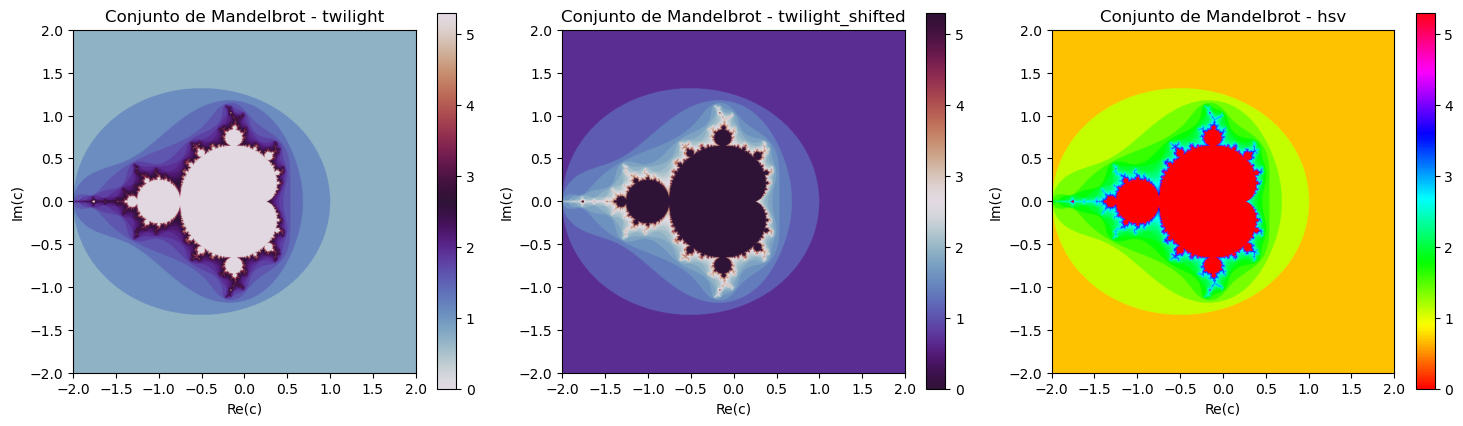

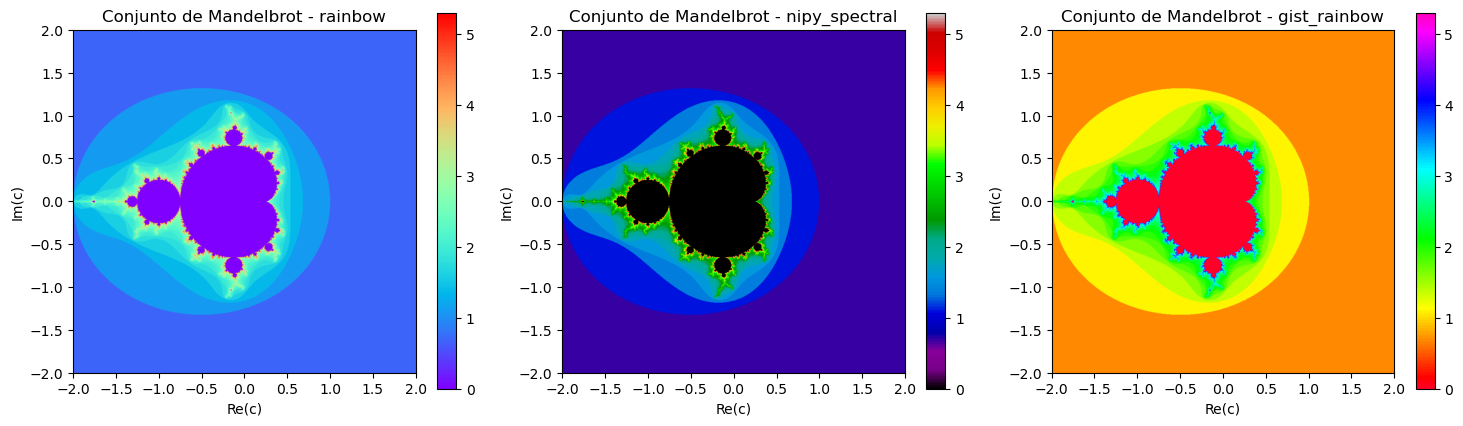

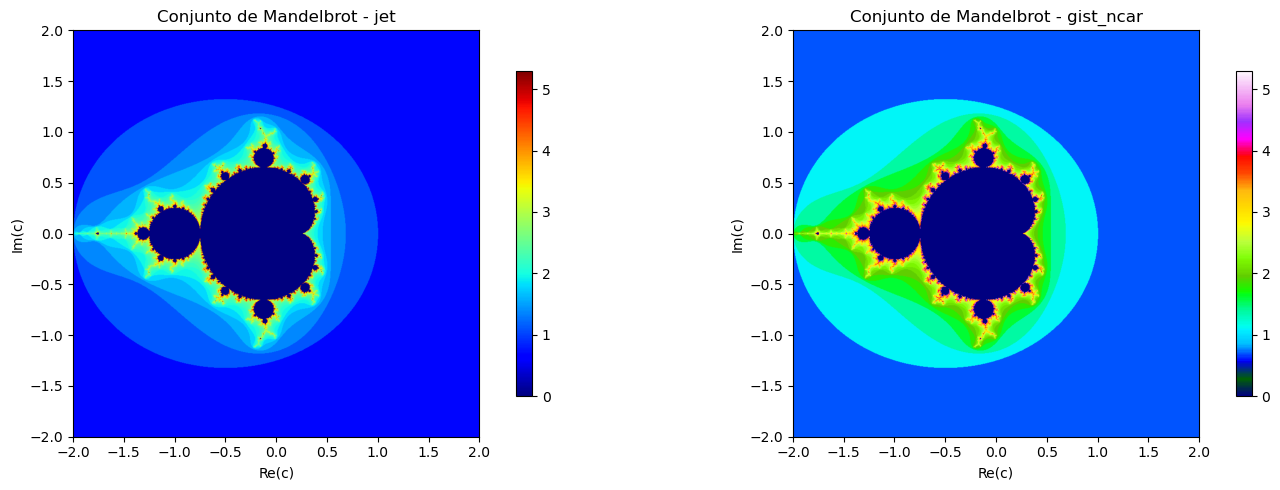

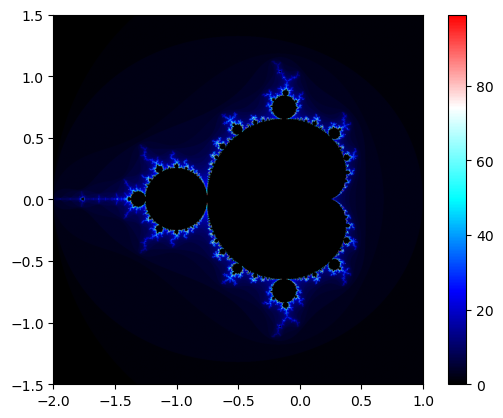

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
N = 800          # resolución de la cuadrícula
iter_max = 200   # máximo de iteraciones

# Crear la cuadrícula de valores de c
x = np.linspace(-2, 2, N)
y = np.linspace(-2, 2, N)
X, Y = np.meshgrid(x, y)
C = X + 1j*Y   # plano complejo

# Inicializar Z y matriz de tiempos de escape
Z = np.zeros_like(C, dtype=complex)
escape_time = np.zeros(C.shape, dtype=int)

# Iterar la fórmula
for k in range(iter_max):
    Z = Z**2 + C
    mask = (np.abs(Z) > 2) & (escape_time == 0)  # puntos que escapan en esta iteración
    escape_time[mask] = k   # guardar el tiempo de escape

# Opcional: usar logaritmo para resaltar detalles finos
escape_time = np.log(escape_time + 1)

# Crear una figura con 3 subplots horizontales
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Lista de colormaps a usar
colormaps = ['binary', 'viridis', 'cividis']
titles = ['Conjunto de Mandelbrot - binary', 'Conjunto de Mandelbrot - viridis', 'Conjunto de Mandelbrot - cividis']

# Graficar cada colormap en un subplot horizontal
for i, (ax, cmap, title) in enumerate(zip(axes, colormaps, titles)):
    im = ax.imshow(escape_time, extent=[-2, 2, -2, 2], cmap=cmap, origin='lower')
    ax.set_xlabel("Re(c)")
    ax.set_ylabel("Im(c)")
    ax.set_title(title)
    
    # Añadir colorbar a cada subplot
    plt.colorbar(im, ax=ax, shrink=0.8)

# Ajustar el espacio entre subplots
plt.tight_layout()
plt.show()


# REPETIR PARA OTROS 3 COLORMAPS
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

colormaps = ['hot', 'inferno', 'magma']
titles = ['Conjunto de Mandelbrot - hot', 'Conjunto de Mandelbrot - inferno', 'Conjunto de Mandelbrot - magma']

for i, (ax, cmap, title) in enumerate(zip(axes, colormaps, titles)):
    im = ax.imshow(escape_time, extent=[-2, 2, -2, 2], cmap=cmap, origin='lower')
    ax.set_xlabel("Re(c)")
    ax.set_ylabel("Im(c)")
    ax.set_title(title)

    plt.colorbar(im, ax=ax, shrink=0.8)

plt.tight_layout()
plt.show()


# REPETIR PARA OTROS 3 COLORMAPS
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

colormaps = ['plasma', 'cool', 'winter']
titles = ['Conjunto de Mandelbrot - plasma', 'Conjunto de Mandelbrot - cool', 'Conjunto de Mandelbrot - winter']

for i, (ax, cmap, title) in enumerate(zip(axes, colormaps, titles)):
    im = ax.imshow(escape_time, extent=[-2, 2, -2, 2], cmap=cmap, origin='lower')
    ax.set_xlabel("Re(c)")
    ax.set_ylabel("Im(c)")
    ax.set_title(title)
    
    plt.colorbar(im, ax=ax, shrink=0.8)

plt.tight_layout()
plt.show()


# REPETIR PARA OTROS 3 COLORMAPS
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

colormaps = ['spring', 'summer', 'autumn']
titles = ['Conjunto de Mandelbrot - spring', 'Conjunto de Mandelbrot - summer', 'Conjunto de Mandelbrot - autumn']

for i, (ax, cmap, title) in enumerate(zip(axes, colormaps, titles)):
    im = ax.imshow(escape_time, extent=[-2, 2, -2, 2], cmap=cmap, origin='lower')
    ax.set_xlabel("Re(c)")
    ax.set_ylabel("Im(c)")
    ax.set_title(title)
    
    plt.colorbar(im, ax=ax, shrink=0.8)

plt.tight_layout()
plt.show()


# REPETIR PARA OTROS 3 COLORMAPS
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

colormaps = ['bone', 'gray', 'copper']
titles = ['Conjunto de Mandelbrot - bone', 'Conjunto de Mandelbrot - gray', 'Conjunto de Mandelbrot - copper']

for i, (ax, cmap, title) in enumerate(zip(axes, colormaps, titles)):
    im = ax.imshow(escape_time, extent=[-2, 2, -2, 2], cmap=cmap, origin='lower')
    ax.set_xlabel("Re(c)")
    ax.set_ylabel("Im(c)")
    ax.set_title(title)
    
    plt.colorbar(im, ax=ax, shrink=0.8)

plt.tight_layout()
plt.show()


# REPETIR PARA OTROS 3 COLORMAPS
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

colormaps = ['pink', 'seismic', 'coolwarm']
titles = ['Conjunto de Mandelbrot - pink', 'Conjunto de Mandelbrot - seismic', 'Conjunto de Mandelbrot - coolwarm']

for i, (ax, cmap, title) in enumerate(zip(axes, colormaps, titles)):
    im = ax.imshow(escape_time, extent=[-2, 2, -2, 2], cmap=cmap, origin='lower')
    ax.set_xlabel("Re(c)")
    ax.set_ylabel("Im(c)")
    ax.set_title(title)
    
    plt.colorbar(im, ax=ax, shrink=0.8)

plt.tight_layout()
plt.show()


# REPETIR PARA OTROS 3 COLORMAPS
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

colormaps = ['bwr', 'RdBu', 'RdYlBu']
titles = ['Conjunto de Mandelbrot - bwr', 'Conjunto de Mandelbrot - RdBu', 'Conjunto de Mandelbrot - RdYlBu']

for i, (ax, cmap, title) in enumerate(zip(axes, colormaps, titles)):
    im = ax.imshow(escape_time, extent=[-2, 2, -2, 2], cmap=cmap, origin='lower')
    ax.set_xlabel("Re(c)")
    ax.set_ylabel("Im(c)")
    ax.set_title(title)
    
    plt.colorbar(im, ax=ax, shrink=0.8)

plt.tight_layout()
plt.show()


# REPETIR PARA OTROS 3 COLORMAPS
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

colormaps = ['RdYlGn', 'PiYG', 'PRGn']
titles = ['Conjunto de Mandelbrot - RdYlGn', 'Conjunto de Mandelbrot - PiYG', 'Conjunto de Mandelbrot - PRGn']

for i, (ax, cmap, title) in enumerate(zip(axes, colormaps, titles)):
    im = ax.imshow(escape_time, extent=[-2, 2, -2, 2], cmap=cmap, origin='lower')
    ax.set_xlabel("Re(c)")
    ax.set_ylabel("Im(c)")
    ax.set_title(title)
    
    plt.colorbar(im, ax=ax, shrink=0.8)

plt.tight_layout()
plt.show()


# REPETIR PARA OTROS 3 COLORMAPS
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

colormaps = ['BrBG', 'PuOr', 'Spectral']
titles = ['Conjunto de Mandelbrot - BrBG', 'Conjunto de Mandelbrot - PuOr', 'Conjunto de Mandelbrot - Spectral']

for i, (ax, cmap, title) in enumerate(zip(axes, colormaps, titles)):
    im = ax.imshow(escape_time, extent=[-2, 2, -2, 2], cmap=cmap, origin='lower')
    ax.set_xlabel("Re(c)")
    ax.set_ylabel("Im(c)")
    ax.set_title(title)
    
    plt.colorbar(im, ax=ax, shrink=0.8)

plt.tight_layout()
plt.show()


# REPETIR PARA OTROS 3 COLORMAPS
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

colormaps = ['twilight', 'twilight_shifted', 'hsv']
titles = ['Conjunto de Mandelbrot - twilight', 'Conjunto de Mandelbrot - twilight_shifted', 'Conjunto de Mandelbrot - hsv']

for i, (ax, cmap, title) in enumerate(zip(axes, colormaps, titles)):
    im = ax.imshow(escape_time, extent=[-2, 2, -2, 2], cmap=cmap, origin='lower')
    ax.set_xlabel("Re(c)")
    ax.set_ylabel("Im(c)")
    ax.set_title(title)
    
    plt.colorbar(im, ax=ax, shrink=0.8)

plt.tight_layout()
plt.show()


# REPETIR PARA OTROS 3 COLORMAPS
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

colormaps = ['rainbow', 'nipy_spectral', 'gist_rainbow']
titles = ['Conjunto de Mandelbrot - rainbow', 'Conjunto de Mandelbrot - nipy_spectral', 'Conjunto de Mandelbrot - gist_rainbow']

for i, (ax, cmap, title) in enumerate(zip(axes, colormaps, titles)):
    im = ax.imshow(escape_time, extent=[-2, 2, -2, 2], cmap=cmap, origin='lower')
    ax.set_xlabel("Re(c)")
    ax.set_ylabel("Im(c)")
    ax.set_title(title)
    
    plt.colorbar(im, ax=ax, shrink=0.8)

plt.tight_layout()
plt.show()


# REPETIR PARA OTROS 3 COLORMAPS
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

colormaps = ['jet', 'gist_ncar']
titles = ['Conjunto de Mandelbrot - jet', 'Conjunto de Mandelbrot - gist_ncar']

for i, (ax, cmap, title) in enumerate(zip(axes, colormaps, titles)):
    im = ax.imshow(escape_time, extent=[-2, 2, -2, 2], cmap=cmap, origin='lower')
    ax.set_xlabel("Re(c)")
    ax.set_ylabel("Im(c)")
    ax.set_title(title)
    
    plt.colorbar(im, ax=ax, shrink=0.8)

plt.tight_layout()
plt.show()


# COLOR PERSONALIZADO
from matplotlib.colors import LinearSegmentedColormap

colors = ['black', 'blue', 'cyan', 'white', 'red']
custom_cmap = LinearSegmentedColormap.from_list('my_cmap', colors, N=256)

plt.imshow(div_time, extent=[-2, 1, -1.5, 1.5], cmap=custom_cmap, origin="lower")
plt.colorbar()
plt.show()

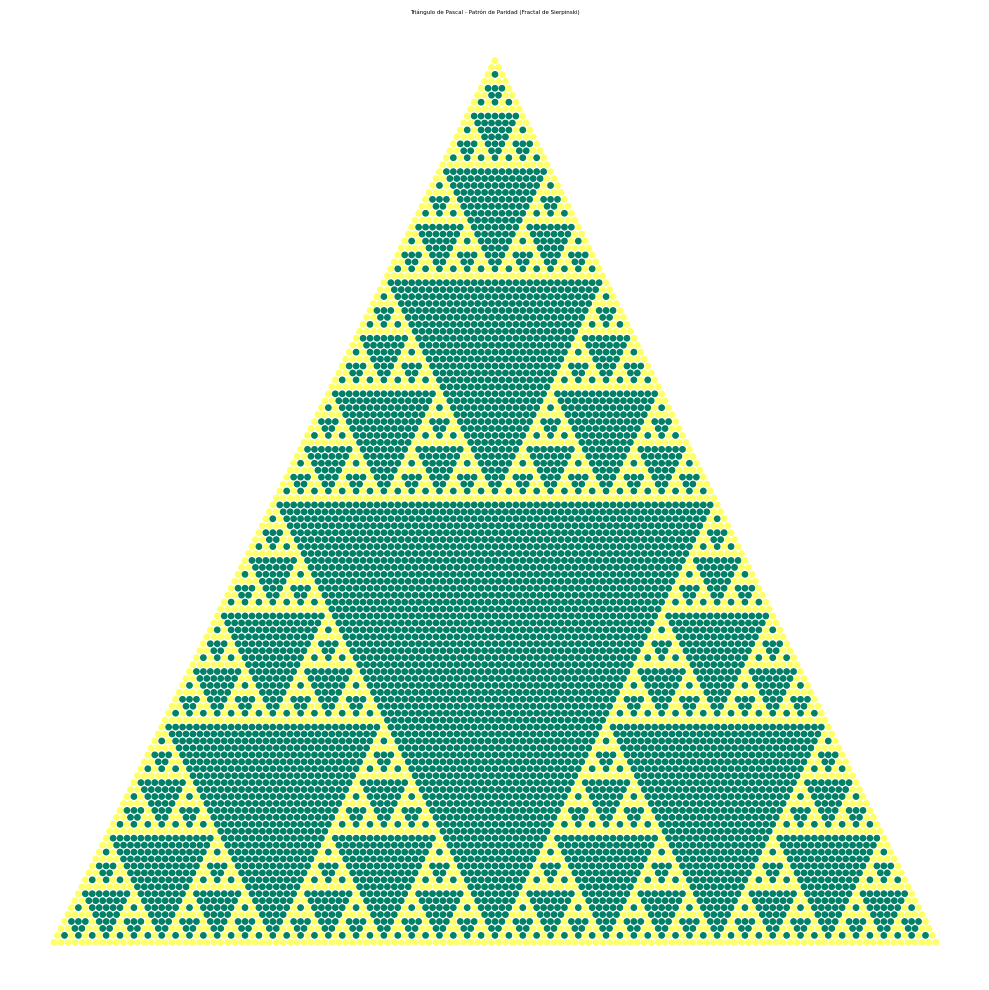

In [91]:
import matplotlib.pyplot as plt
import numpy as np
from math import comb

def triangulo_pascal_paridad(niveles):
    """Triángulo coloreado por paridad (fractal de Sierpinski)"""
    puntos = []
    colores = []
    
    for n in range(niveles):
        for k in range(n + 1):
            x = k - n/2
            y = -n
            valor = comb(n, k)
            
            puntos.append((x, y))
            # Color según paridad (1 = impar, 0 = par)
            colores.append(valor % 2)
    
    return np.array(puntos), colores

# Configuración
niveles = 128
puntos, colores = triangulo_pascal_paridad(niveles)

plt.figure(figsize=(10, 10))
scatter = plt.scatter(puntos[:, 0], puntos[:, 1], 
                     c=colores, cmap='summer', s=15, alpha=1)

plt.title('Triángulo de Pascal - Patrón de Paridad (Fractal de Sierpinski)', 
          fontsize=4)
plt.axis('equal')
plt.axis('off')
plt.tight_layout()
plt.show()